In [ ]:
#import libraries
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [ ]:
#initalize plotly
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Volume
0,01/13/2023,116.55,122.63,115.60,122.40,"180,714,094"
1,01/12/2023,122.56,124.13,117.00,123.56,"169,400,891"
2,01/11/2023,122.09,125.95,120.51,123.22,"183,810,797"
3,01/10/2023,121.07,122.76,114.92,118.85,"167,642,500"
4,01/09/2023,118.96,123.52,117.11,119.77,"190,284,000"
...,...,...,...,...,...,...
247,01/20/2022,336.58,347.22,331.33,332.09,"70,488,817"
248,01/19/2022,347.23,351.56,331.67,331.88,"75,442,579"
249,01/18/2022,342.20,356.93,338.69,343.50,"66,989,473"
250,01/14/2022,339.96,350.67,337.79,349.87,"72,924,493"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   Open    252 non-null    float64
 2   High    252 non-null    float64
 3   Low     252 non-null    float64
 4   Close   252 non-null    float64
 5   Volume  252 non-null    object 
dtypes: float64(4), object(2)
memory usage: 11.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close
count,252.000000,252.000000,252.000000,252.000000
mean,255.617738,261.871944,248.289206,254.642897
std,60.919578,61.960132,59.731179,60.694123
min,103.000000,111.750000,101.810000,108.100000
25%,220.807500,226.312500,213.072500,220.715000
50%,265.665000,273.710000,257.170000,265.965000
75%,300.022500,306.252500,291.647500,299.767500
max,378.770000,384.290000,362.430000,381.820000


In [ ]:
df = df.sort_values(by="Date")
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

In [ ]:
px.area(df,x="Date",y="Close",title = 'Tesla Stock Closing Prices Over Time')

In [ ]:
px.line(df,x="Date",y="Close",title="Tesla Stock Closing Prices Over Time")

In [ ]:
px.area(df,x="Date",y="Volume",title="Tesla Stock Volume Over Time")

In [ ]:
px.bar(df,y="Volume")

In [ ]:
px.box(df, y="Close")

In [ ]:
df

,Date,Open,High,Low,Close,Volume
8,01/03/2023,118.47,118.80,104.64,108.10,231402797.0
7,01/04/2023,109.11,114.59,107.52,113.64,180388984.0
6,01/05/2023,110.51,111.75,107.16,110.34,157986297.0
5,01/06/2023,103.00,114.39,101.81,113.06,220911109.0
4,01/09/2023,118.96,123.52,117.11,119.77,190284000.0
...,...,...,...,...,...,...
13,12/23/2022,126.37,128.62,121.02,123.15,166989703.0
12,12/27/2022,117.50,119.67,108.76,109.10,208643391.0
11,12/28/2022,110.35,116.27,108.24,112.71,221070500.0
10,12/29/2022,120.39,123.57,117.50,121.82,221923297.0


In [ ]:
col = ['Date','Close']
newDF = pd.DataFrame(df, columns=col)
newDF

,Date,Close
8,01/03/2023,108.10
7,01/04/2023,113.64
6,01/05/2023,110.34
5,01/06/2023,113.06
4,01/09/2023,119.77
...,...,...
13,12/23/2022,123.15
12,12/27/2022,109.10
11,12/28/2022,112.71
10,12/29/2022,121.82


In [ ]:
prophet_df = newDF.rename(columns={'Date':'ds', 'Close': 'y'})
prophet_df

,ds,y
8,01/03/2023,108.10
7,01/04/2023,113.64
6,01/05/2023,110.34
5,01/06/2023,113.06
4,01/09/2023,119.77
...,...,...
13,12/23/2022,123.15
12,12/27/2022,109.10
11,12/28/2022,112.71
10,12/29/2022,121.82


In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpouqxkq5i/sftnt3b8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpouqxkq5i/ww6zxb1h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84438', 'data', 'file=/tmp/tmpouqxkq5i/sftnt3b8.json', 'init=/tmp/tmpouqxkq5i/ww6zxb1h.json', 'output', 'file=/tmp/tmpouqxkq5i/prophet_modelc0n2leco/prophet_model-20250115190024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:00:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:00:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-13,324.085761,283.096533,356.966515,324.085761,324.085761,-4.219611,-4.219611,-4.219611,-4.219611,-4.219611,-4.219611,0.0,0.0,0.0,319.866150
1,2022-01-14,323.730397,283.177438,356.833933,323.730397,323.730397,-5.745593,-5.745593,-5.745593,-5.745593,-5.745593,-5.745593,0.0,0.0,0.0,317.984804
2,2022-01-18,322.308939,280.041783,356.341209,322.308939,322.308939,-4.373081,-4.373081,-4.373081,-4.373081,-4.373081,-4.373081,0.0,0.0,0.0,317.935858
3,2022-01-19,321.953574,280.444475,357.561475,321.953574,321.953574,-3.540678,-3.540678,-3.540678,-3.540678,-3.540678,-3.540678,0.0,0.0,0.0,318.412895
4,2022-01-20,321.598209,279.113889,353.698770,321.598209,321.598209,-4.219611,-4.219611,-4.219611,-4.219611,-4.219611,-4.219611,0.0,0.0,0.0,317.378598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2023-02-08,89.806727,48.094260,126.544191,87.719954,92.023060,-3.540678,-3.540678,-3.540678,-3.540678,-3.540678,-3.540678,0.0,0.0,0.0,86.266049
278,2023-02-09,88.531237,47.501250,124.708503,86.283519,90.967474,-4.219611,-4.219611,-4.219611,-4.219611,-4.219611,-4.219611,0.0,0.0,0.0,84.311626
279,2023-02-10,87.255746,45.283330,117.321970,84.900426,89.870657,-5.745593,-5.745593,-5.745593,-5.745593,-5.745593,-5.745593,0.0,0.0,0.0,81.510154
280,2023-02-11,85.980256,57.645736,132.816475,83.485181,88.764727,9.608898,9.608898,9.608898,9.608898,9.608898,9.608898,0.0,0.0,0.0,95.589154


In [ ]:
px.line(forecast, x = 'ds', y = 'yhat')

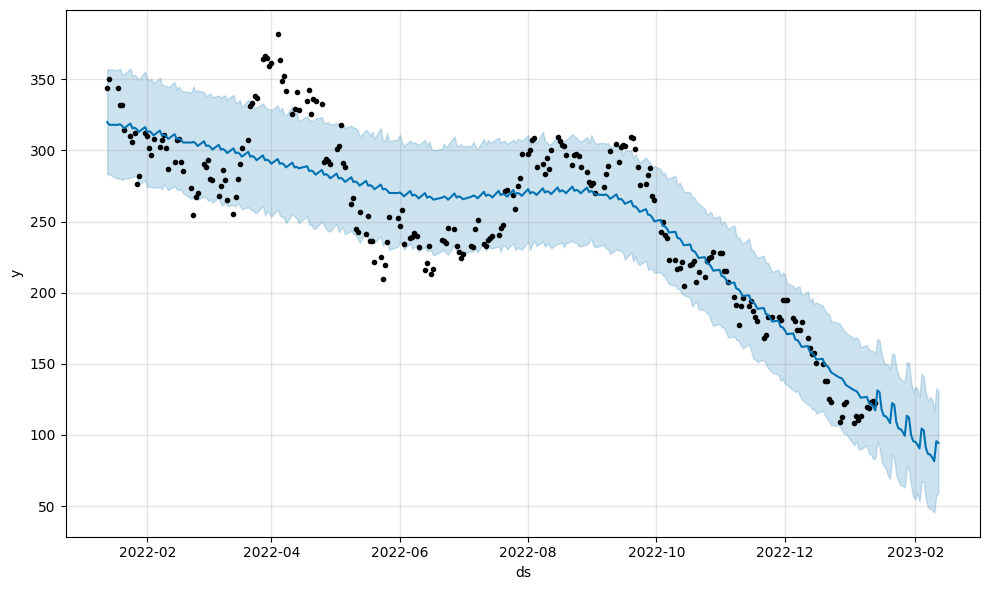

In [ ]:
figure1 = m.plot(forecast, xlabel = 'ds', ylabel = 'y')

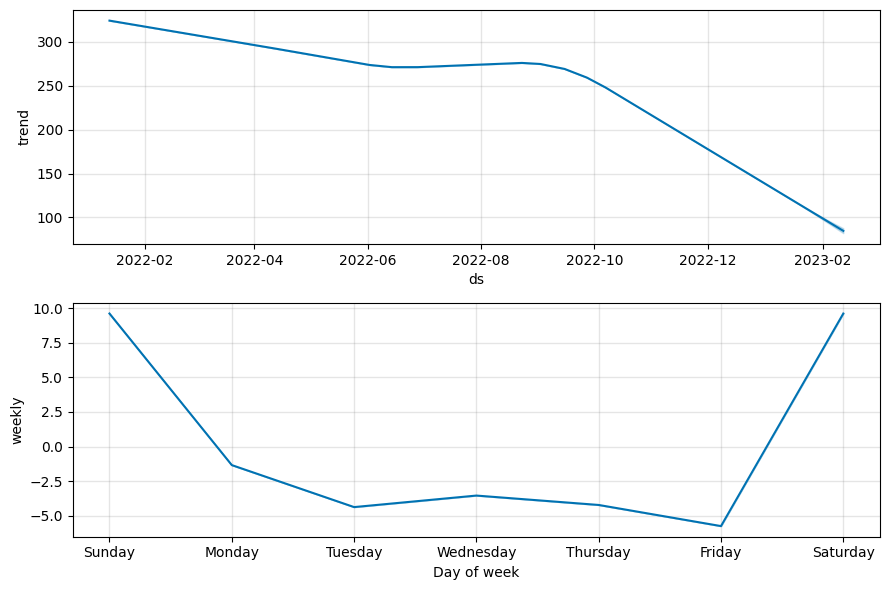

In [ ]:
figure2 = m.plot_components(forecast)

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>